<a href="https://colab.research.google.com/github/esvannyvn/VSCode/blob/main/Tarea2_EeVN_Limpieza_de_Datos_y_Predicci%C3%B3n_de_Series_Temporales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preparación y Validación DataFrame para Temperatura (Tmin)**

Carga de Librerias

In [567]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

import pmdarima as pm

#
# Esvanny Villarroel
#

Carga de Datos

In [568]:
# Ruta al fichero (cámbiala según tu necesidad)
file_path = './DatosTempValenciaAirport.csv'

# Cargar el fichero en un DataFrame
df = pd.read_csv(file_path, sep=";")

# *** El parámetro sep indica qué carácter se va a utilizar para separar los distintos
# *** objetos que se imprimirán en la pantalla. Utilizamos ";" para indicar la separación
# *** de los datos ***

#Mostramos cuantas filas y columnas se han cargado en total
print(f"Se han cargado {df.shape[0]} filas y {df.shape[1]} columnas")

# Mostrar las primeras filas para verificar
print(df.head())

Se han cargado 8678 filas y 3 columnas
    Fecha  Tmax  Tmin
0  1/1/00  16.0   1.6
1  2/1/00  14.5   2.2
2  3/1/00  15.0   5.0
3  4/1/00  16.6   3.0
4  5/1/00  15.8   2.6


Limpieza de Datos Aplicación Temperatura (Tmin)

<ipython-input-569-4e84bb949afc>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)


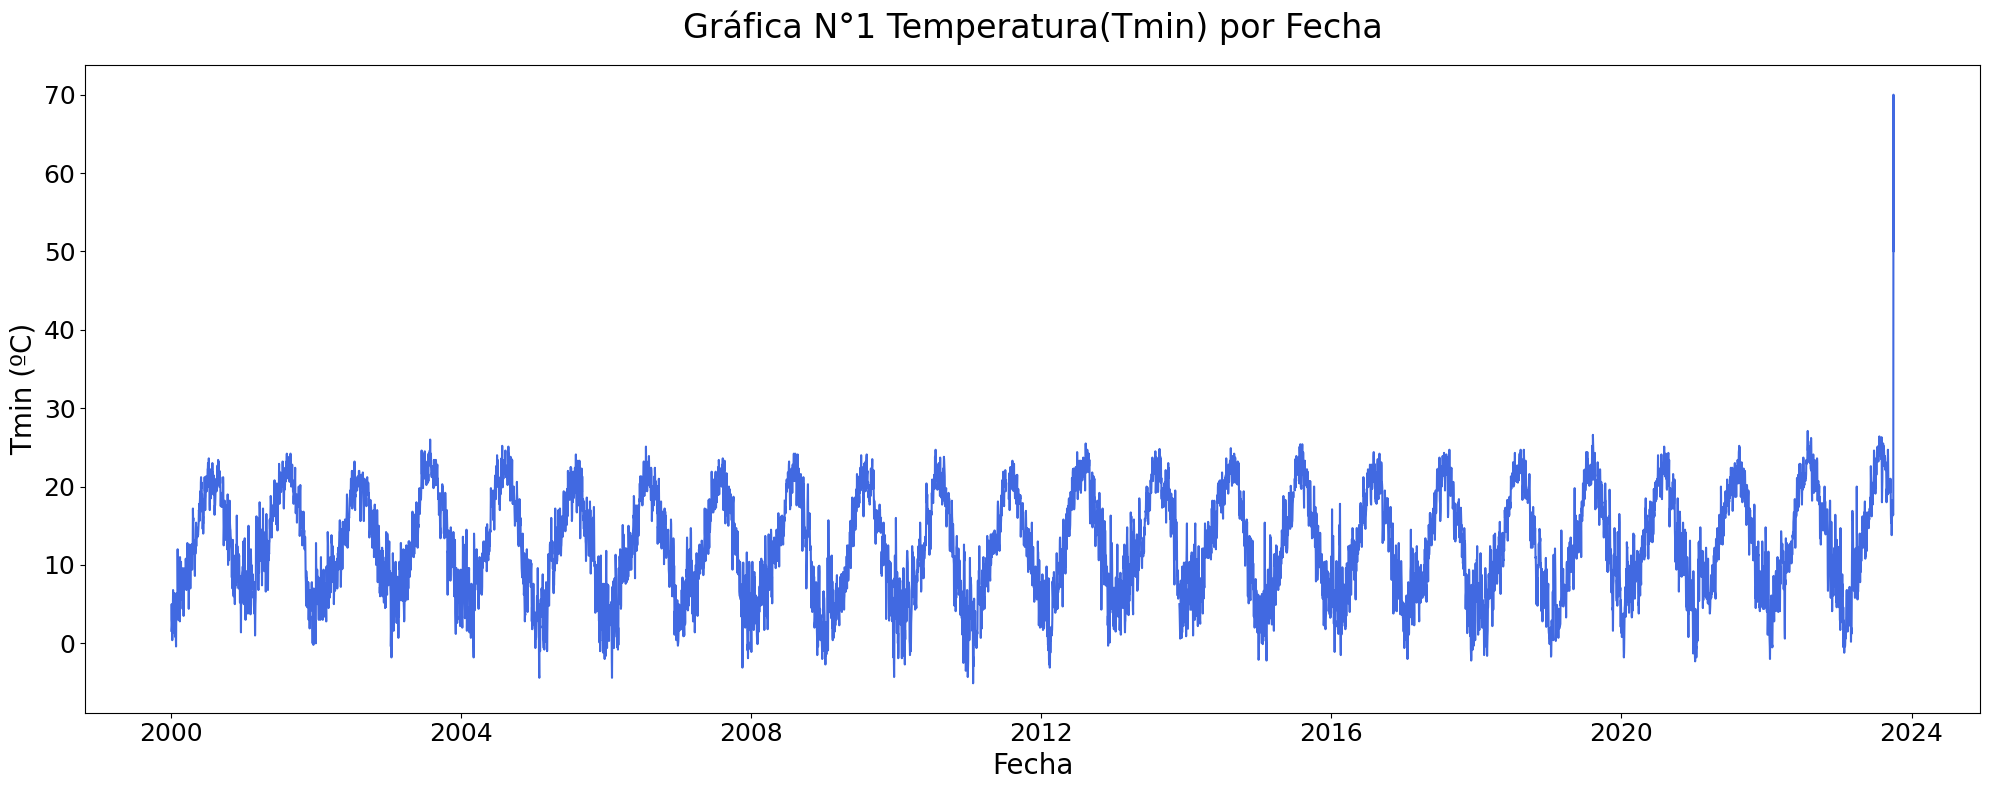

In [569]:
# Asegurarnos de que la columna "Fecha" esté en formato de Fecha
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)

# Crear el gráfico de líneas

# Crear una figura con un tamaño personalizado
plt.figure(figsize=(20, 8))

# Gráfico de líneas con marcadores circulares
plt.plot(df['Fecha'], df['Tmin'], label='Tmin', color='royalblue', marker='')

# Título y etiquetas de los ejes
plt.title('Gráfica N°1 Temperatura(Tmin) por Fecha', fontsize=24, pad= 20)
plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Tmin (ºC)', fontsize=20)

# Desactivar cuadrícula inicial y configurar estilo de cuadrícula
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True, linestyle='--', alpha=0.8)
plt.grid(False)

#  Ajustar el gráfico para evitar solapamientos y mostrarlo
plt.tight_layout()
plt.show()

Preprocesamiento

In [570]:
# Calcular los cuartiles y el rango intercuartílico (IQR)
Q1 = df['Tmin'].quantile(0.25)
Q3 = df['Tmin'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
limite_inferiorMin = Q1 - 1.5 * IQR
limite_superiorMin = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = df[(df['Tmin'] < limite_inferiorMin) | (df['Tmin'] > limite_superiorMin)]

print(f'Número de outliers encontrados: {len(outliers)}')
# Mostrar los outliers encontrados
if len(outliers) != 0:
    print(outliers)

Número de outliers encontrados: 3
          Fecha  Tmax  Tmin
8675 2023-10-02  32.3  70.0
8676 2023-10-03  32.3  50.0
8677 2023-10-04  32.3  50.5


Bloxplot 1

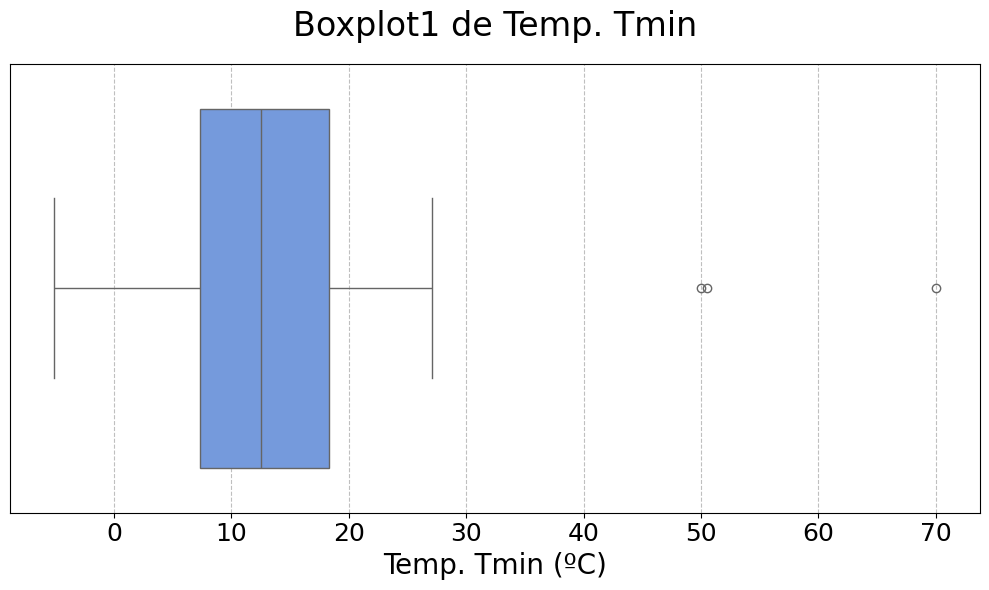

In [571]:
#
# Temperatura Tmin
# Crear el boxplot

# Crear la figura con tamaño ajustado
plt.figure(figsize=(10, 6))

# Colores personalizados para el boxplot usando Seaborn (aunque con Matplotlib)
sns.boxplot(x=df['Tmin'], color='cornflowerblue')

# Título y etiquetas de ejes con tamaños de letra personalizados
plt.title('Boxplot1 de Temp. Tmin', fontsize=24, pad = 20)
plt.xlabel('Temp. Tmin (ºC)', fontsize=20)

# Ajustar el estilo del gráfico
plt.grid(True, linestyle='--', alpha=0.8)
plt.xticks(fontsize=18)
plt.yticks([])

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [572]:
# Tratar los outliers. Eliminamos los outliers del tercer tramo
df.loc[~((df['Tmin'] >= limite_inferiorMin) & (df['Tmin'] <= limite_superiorMin)), 'Tmin'] = np.nan

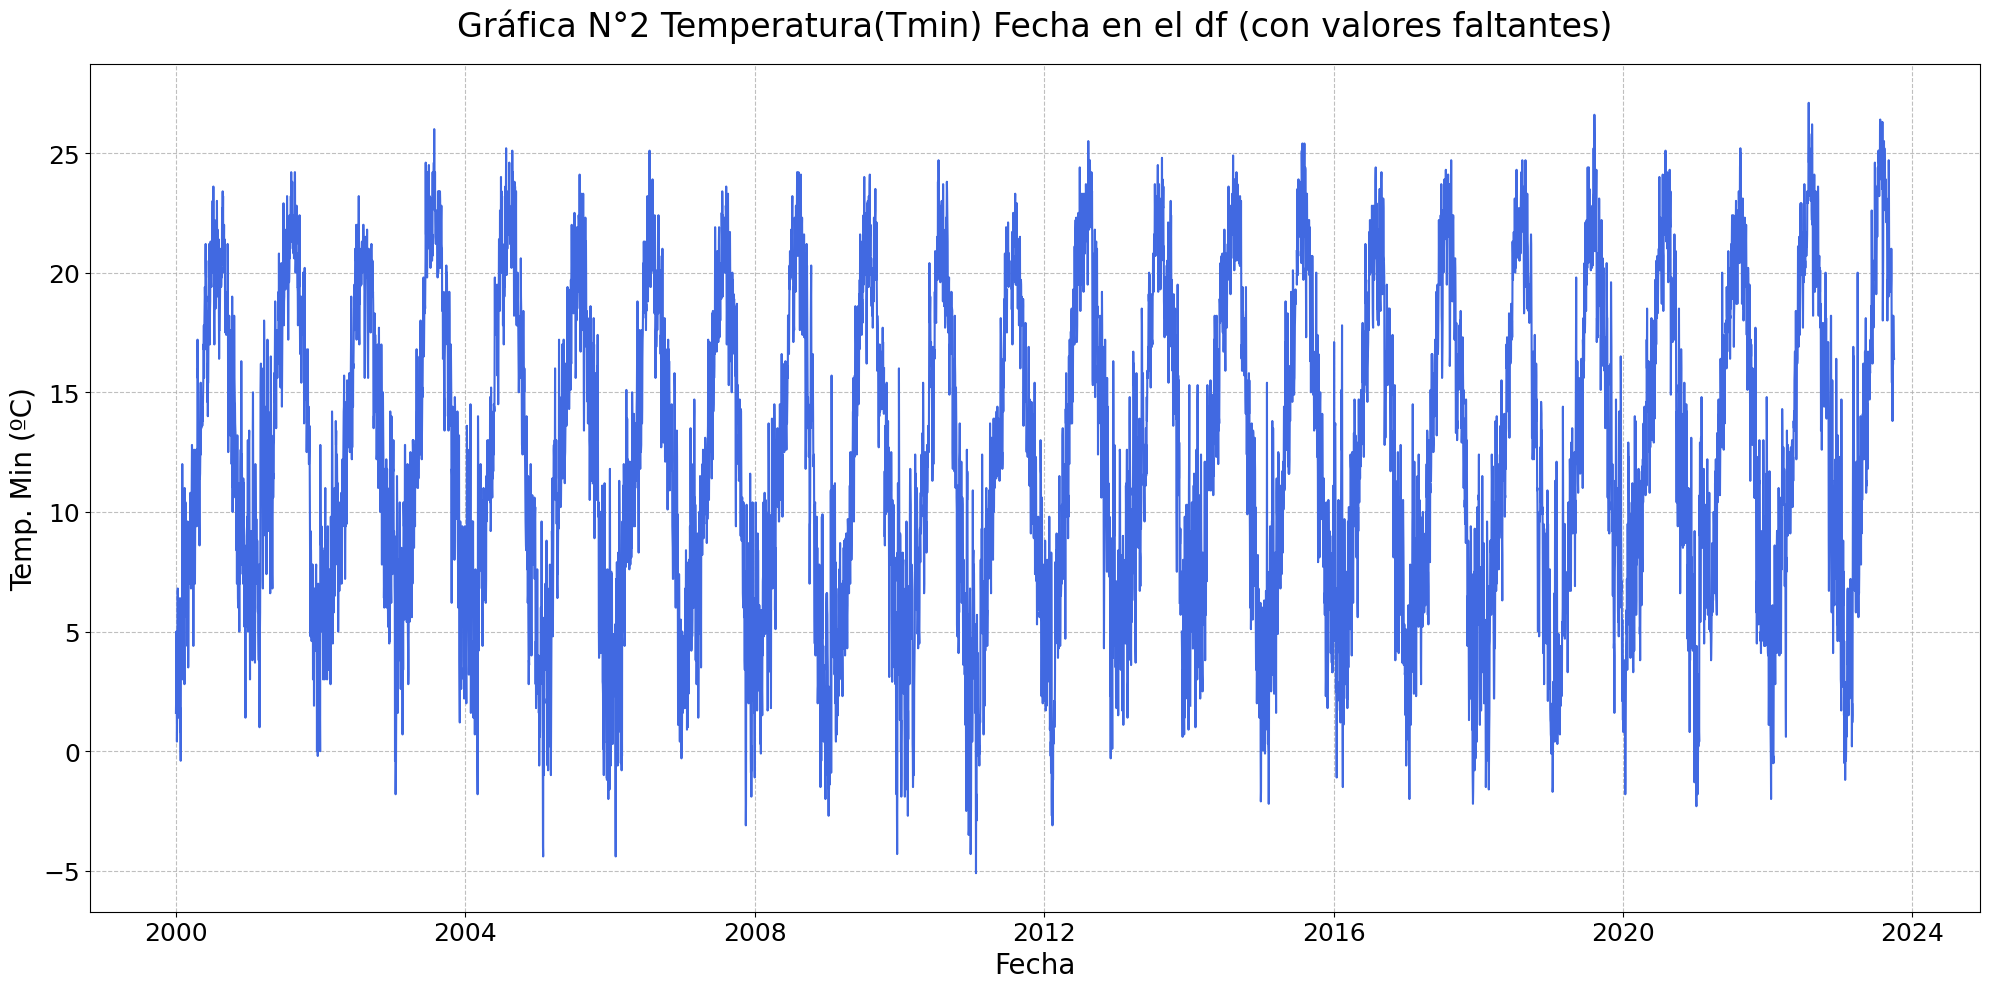

In [573]:
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Crear el gráfico
plt.figure(figsize=(20, 10))
plt.plot(df['Fecha'], df['Tmin'], label='Temp. Min', color='royalblue', marker='')
plt.title('Gráfica N°2 Temperatura(Tmin) Fecha en el df (con valores faltantes)', fontsize=24, pad= 20)
plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Temp. Min (ºC)', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

Interpolación Valores Faltantes

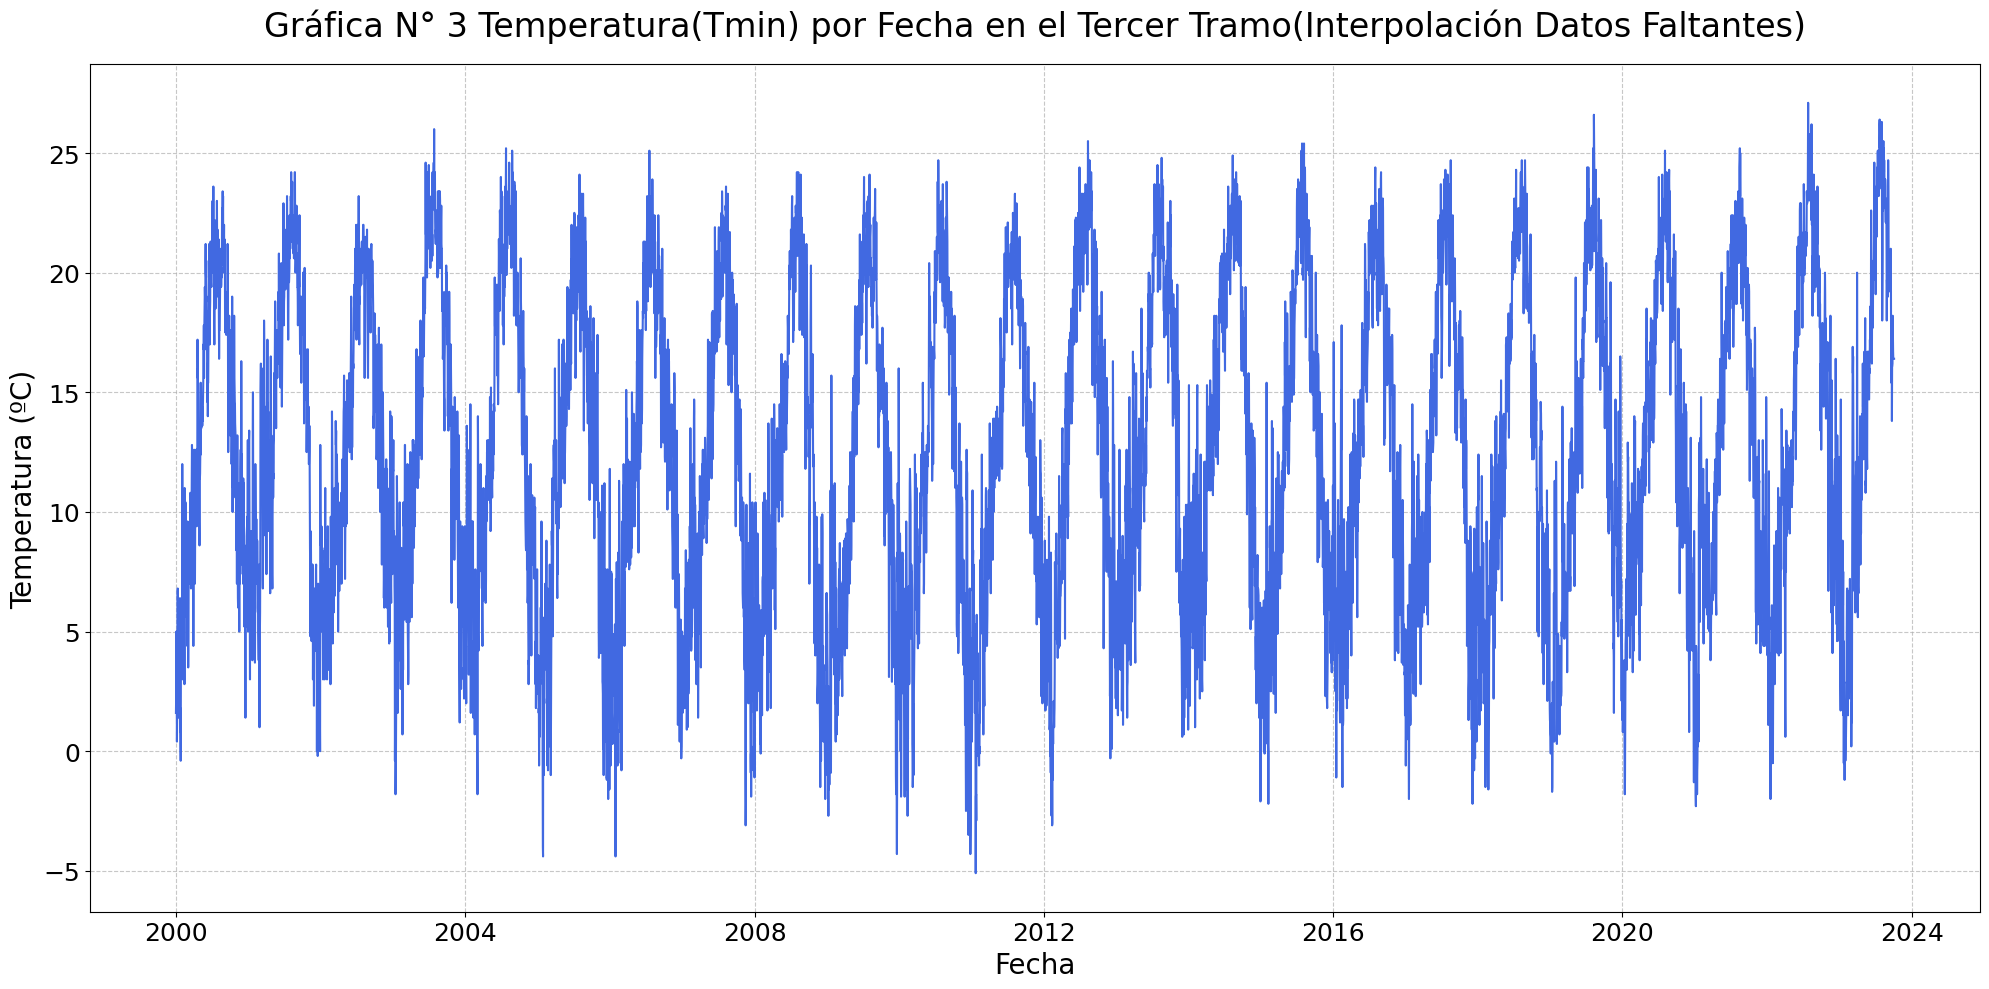

In [574]:
# Temperatura Mínima Tmin
# Interpolar valores faltantes (NaN) en la columna de temperatura
df.loc[:, 'Tmin'] = df['Tmin'].interpolate(method='linear')

# Crear el gráfico de líneas
plt.figure(figsize=(20, 10))
plt.plot(df['Fecha'], df['Tmin'], label='Temperatura(Tmin)', color='royalblue', marker='')
plt.title('Gráfica N° 3 Temperatura(Tmin) por Fecha en el Tercer Tramo(Interpolación Datos Faltantes)', fontsize=24, pad= 20)
plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Temperatura (ºC)', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [575]:
# Obtener los dos primeros tramos que no habíamos modificado
primer_segundo_tramo = df[df['Fecha'] <= '2023-10-04']

# Concatenamos el primer y segundo tramo con el tercero.
df_concatenado = pd.concat([primer_segundo_tramo, df], ignore_index=True)

# Asegurarse de que la columna 'fecha' esté en formato de datetime
df_concatenado['Fecha'] = pd.to_datetime(df_concatenado['Fecha'])

# Ordenamos por la columna 'fecha'
df_concatenado = df_concatenado.sort_values(by='Fecha').reset_index(drop=True)

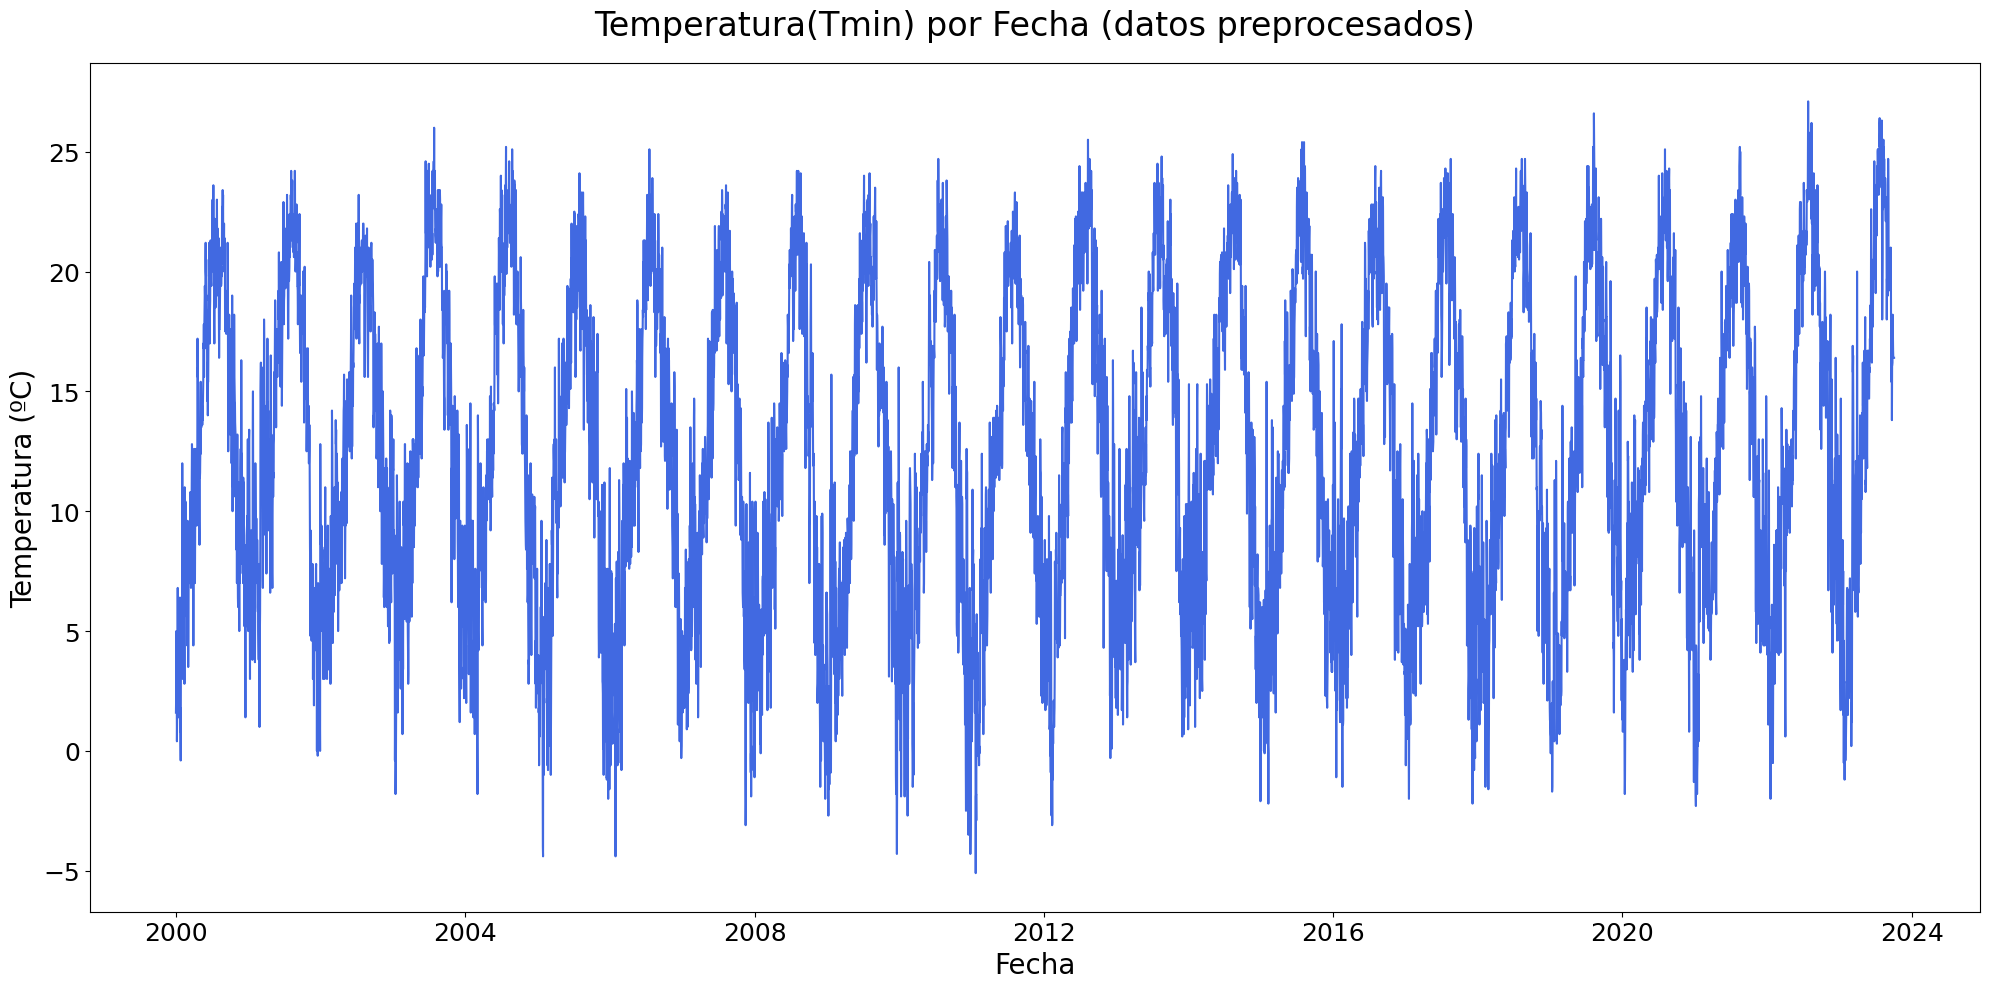

In [576]:
# Crear el gráfico de líneas
plt.figure(figsize=(20, 10))
plt.plot(df_concatenado['Fecha'], df_concatenado['Tmin'], label='Temperatura(Tmin)', color='royalblue', marker='')
plt.title('Temperatura(Tmin) por Fecha (datos preprocesados)', fontsize=24, pad= 20)
plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Temperatura (ºC)', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Preparación y Validación DataFrame para Temperatura (Tmax)

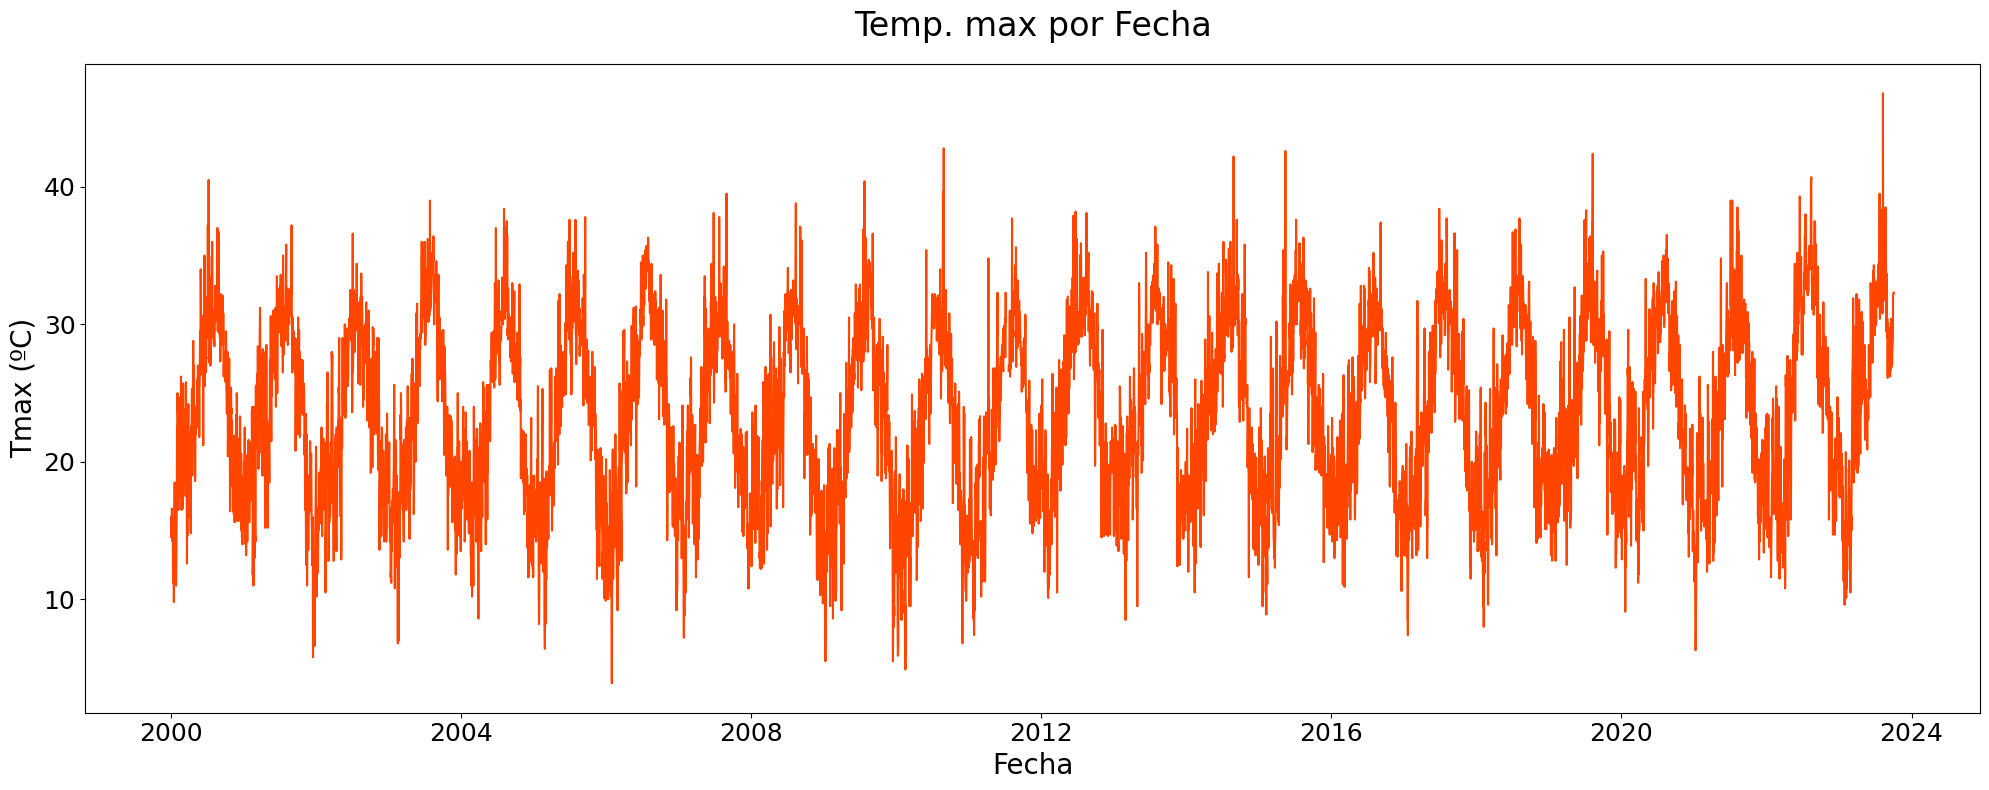

In [577]:
#    Temperatura Máxima
#
# Asegurarnos de que la columna "Fecha" esté en formato de Fecha
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)

# Crear el gráfico de líneas

# Crear una figura con un tamaño personalizado
plt.figure(figsize=(20, 8))

# Gráfico de líneas con marcadores circulares
plt.plot(df['Fecha'], df['Tmax'], label='Tmax', color='orangered', marker='')

# Título y etiquetas de los ejes
plt.title('Temp. max por Fecha', fontsize=24, pad= 20)
plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Tmax (ºC)', fontsize=20)

# Desactivar cuadrícula inicial y configurar estilo de cuadrícula
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.grid(True, linestyle='--', alpha=0.7)
plt.grid(False)

#  Ajustar el gráfico para evitar solapamientos y mostrarlo
plt.tight_layout()
plt.show()

In [578]:
# Preprocesamiento Temperatura Máxima Tmax
#
# Calcular los cuartiles y el rango intercuartílico (IQR)
Q1 = df['Tmax'].quantile(0.25)
Q3 = df['Tmax'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
limite_inferiorMax = Q1 - 1.5 * IQR
limite_superiorMax = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = df[(df['Tmax'] < limite_inferiorMax) | (df['Tmax'] > limite_superiorMax)]

print(f'Número de outliers encontrados: {len(outliers)}')
# Mostrar los outliers encontrados
if len(outliers) != 0:
    print(outliers)

Número de outliers encontrados: 1
          Fecha  Tmax  Tmin
8622 2023-08-10  46.8  24.9


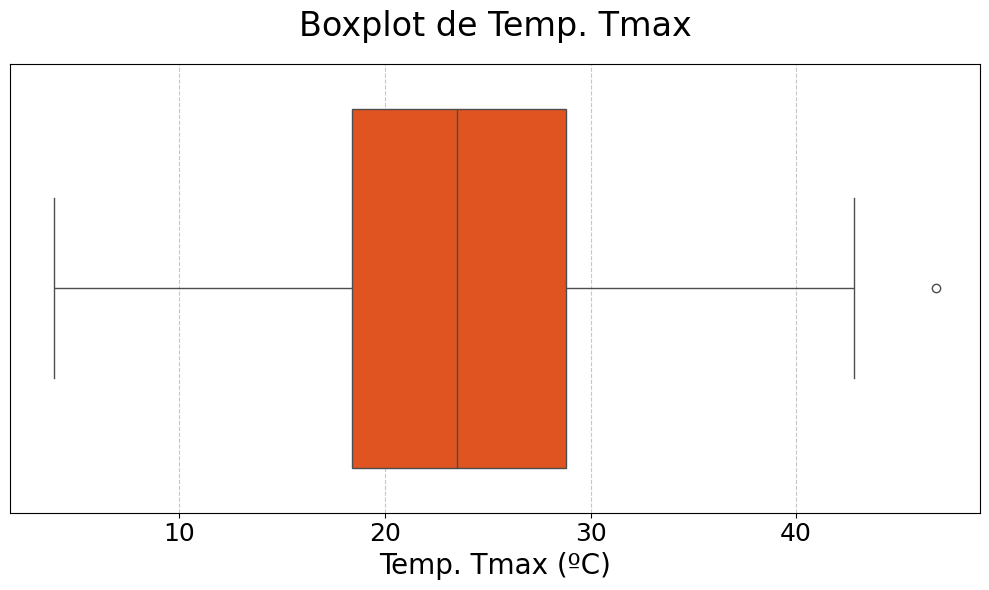

In [579]:
#
# Temperatura Tmax
# Crear el boxplot

# Crear la figura con tamaño ajustado
plt.figure(figsize=(10, 6))

# Colores personalizados para el boxplot usando Seaborn (aunque con Matplotlib)
sns.boxplot(x=df['Tmax'], color='orangered')

# Título y etiquetas de ejes con tamaños de letra personalizados
plt.title('Boxplot de Temp. Tmax', fontsize=24, pad = 20)
plt.xlabel('Temp. Tmax (ºC)', fontsize=20)

# Ajustar el estilo del gráfico
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=18)
plt.yticks([])

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [580]:
# Tratar los outliers. Eliminamos los outliers del tercer tramo
df.loc[~((df['Tmax'] >= limite_inferiorMax) & (df['Tmax'] <= limite_superiorMax)), 'Tmax'] = np.nan

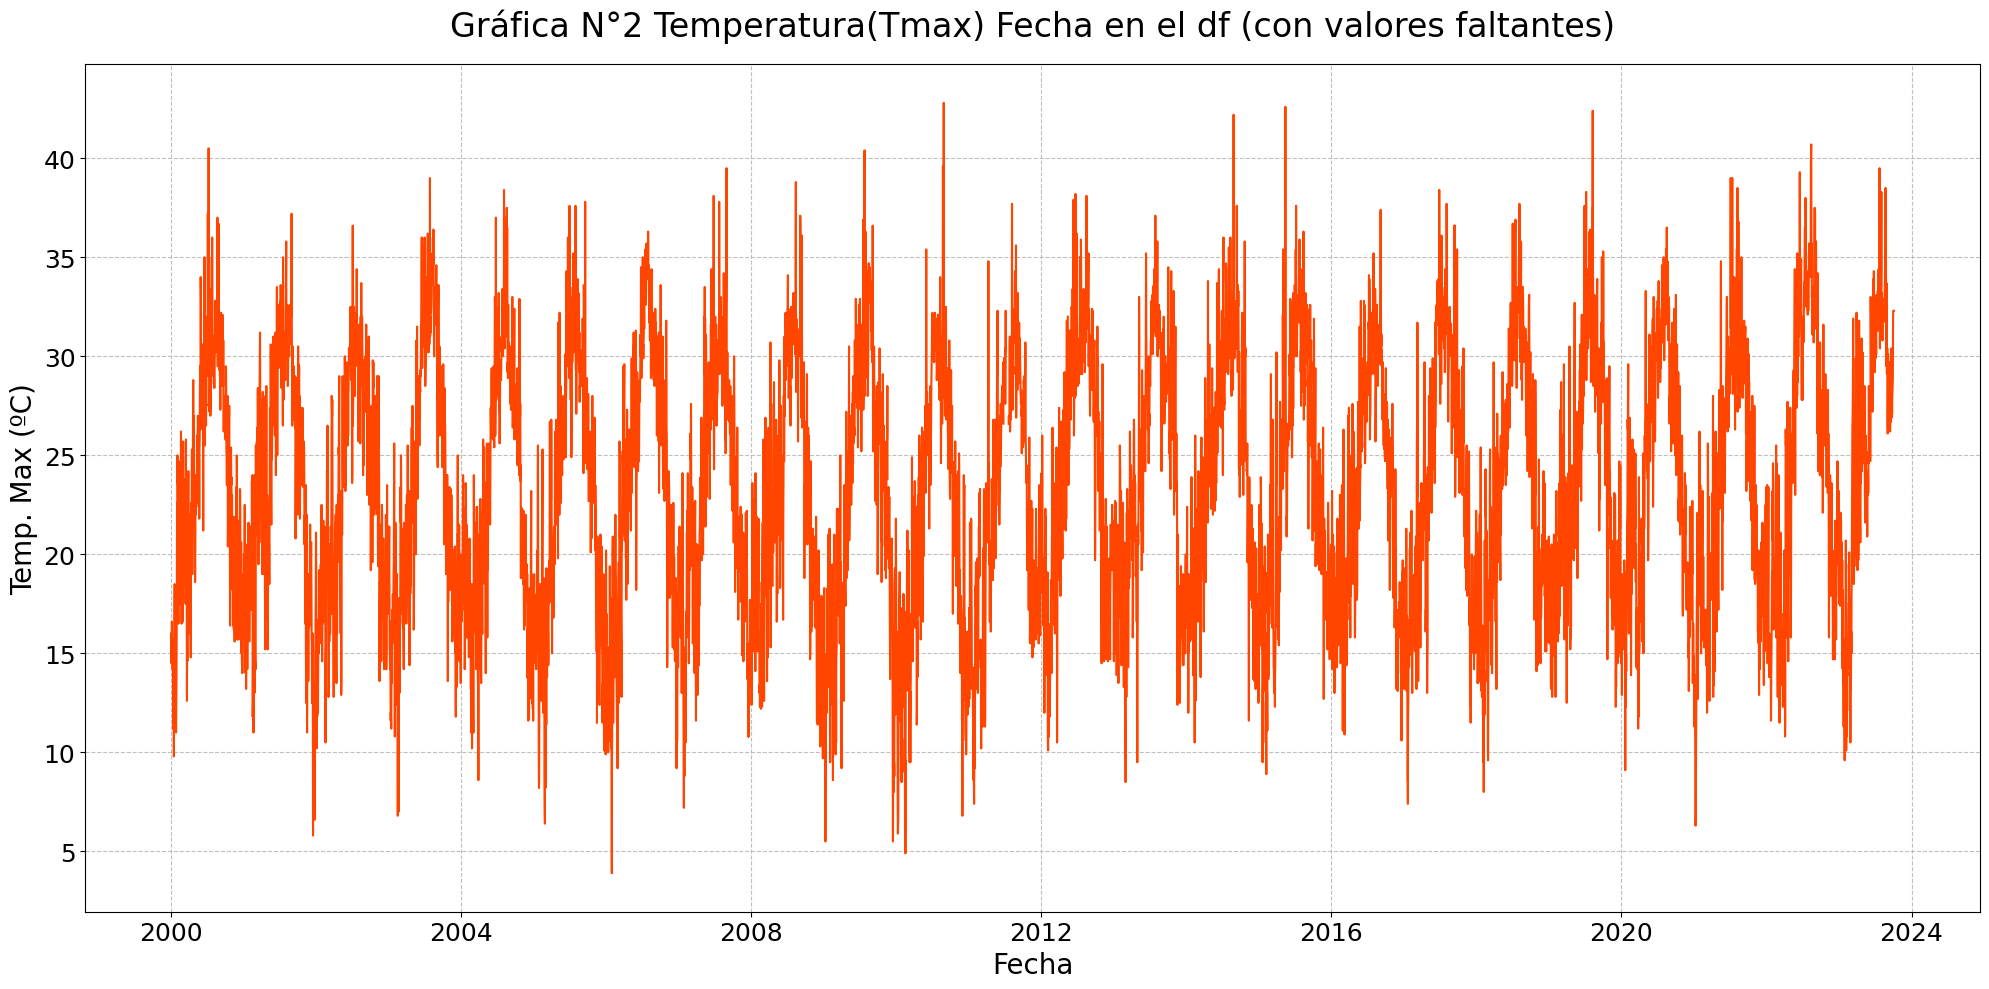

In [581]:
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Crear el gráfico
plt.figure(figsize=(20, 10))
plt.plot(df['Fecha'], df['Tmax'], label='Temp. Max', color='orangered', marker='')
plt.title('Gráfica N°2 Temperatura(Tmax) Fecha en el df (con valores faltantes)', fontsize=24, pad= 20)
plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Temp. Max (ºC)', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

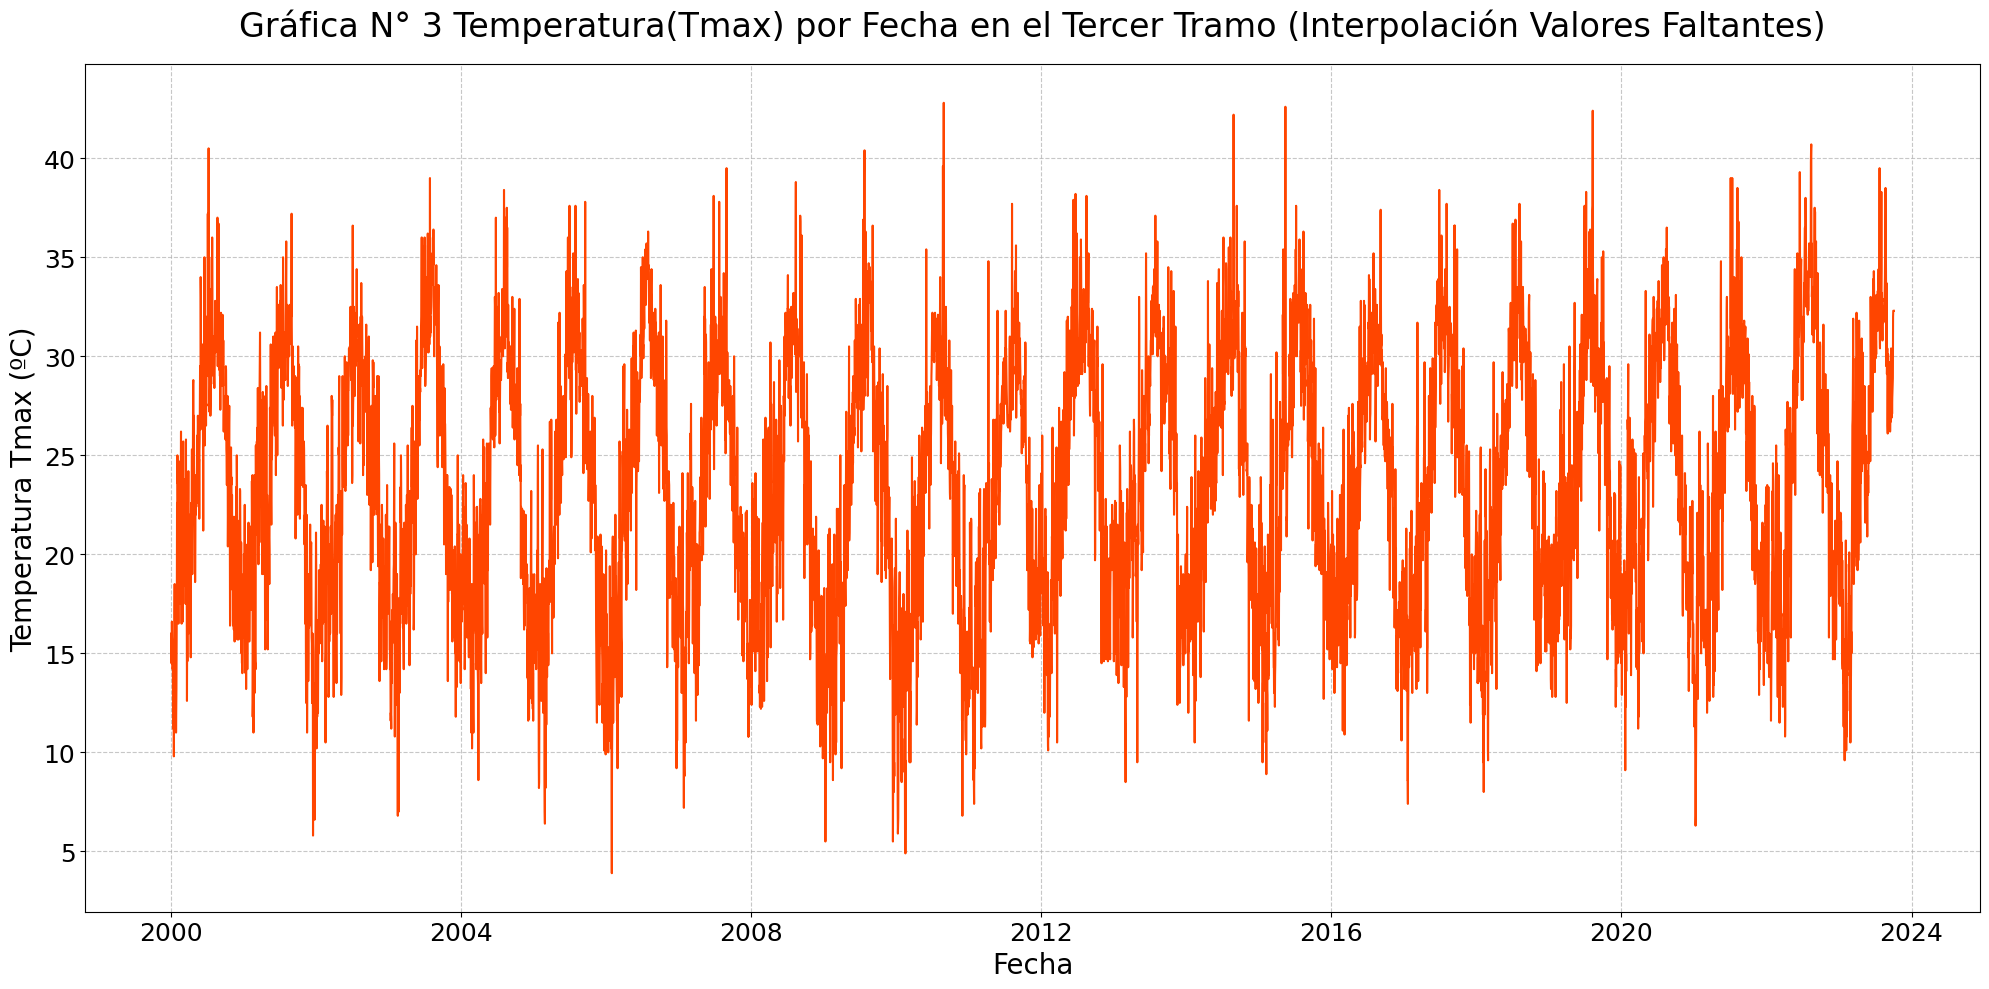

In [582]:
# Temperatura Mínima Tmin
# Interpolar valores faltantes (NaN) en la columna de temperatura
df.loc[:, 'Tmax'] = df['Tmax'].interpolate(method='linear')

# Crear el gráfico de líneas
plt.figure(figsize=(20, 10))
plt.plot(df['Fecha'], df['Tmax'], label='Temperatura(Tmax)', color='orangered', marker='')
plt.title('Gráfica N° 3 Temperatura(Tmax) por Fecha en el Tercer Tramo (Interpolación Valores Faltantes)', fontsize=24, pad= 20)
plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Temperatura Tmax (ºC)', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [583]:
# Obtener los dos primeros tramos que no habíamos modificado
primer_segundo_tramo = df[df['Fecha'] <= '2023-08-10']

# Concatenamos el primer y segundo tramo con el tercero.
df_concatenado = pd.concat([primer_segundo_tramo, df], ignore_index=True)

# Asegurarse de que la columna 'fecha' esté en formato de datetime
df_concatenado['Fecha'] = pd.to_datetime(df_concatenado['Fecha'])

# Ordenamos por la columna 'fecha'
df_concatenado = df_concatenado.sort_values(by='Fecha').reset_index(drop=True)

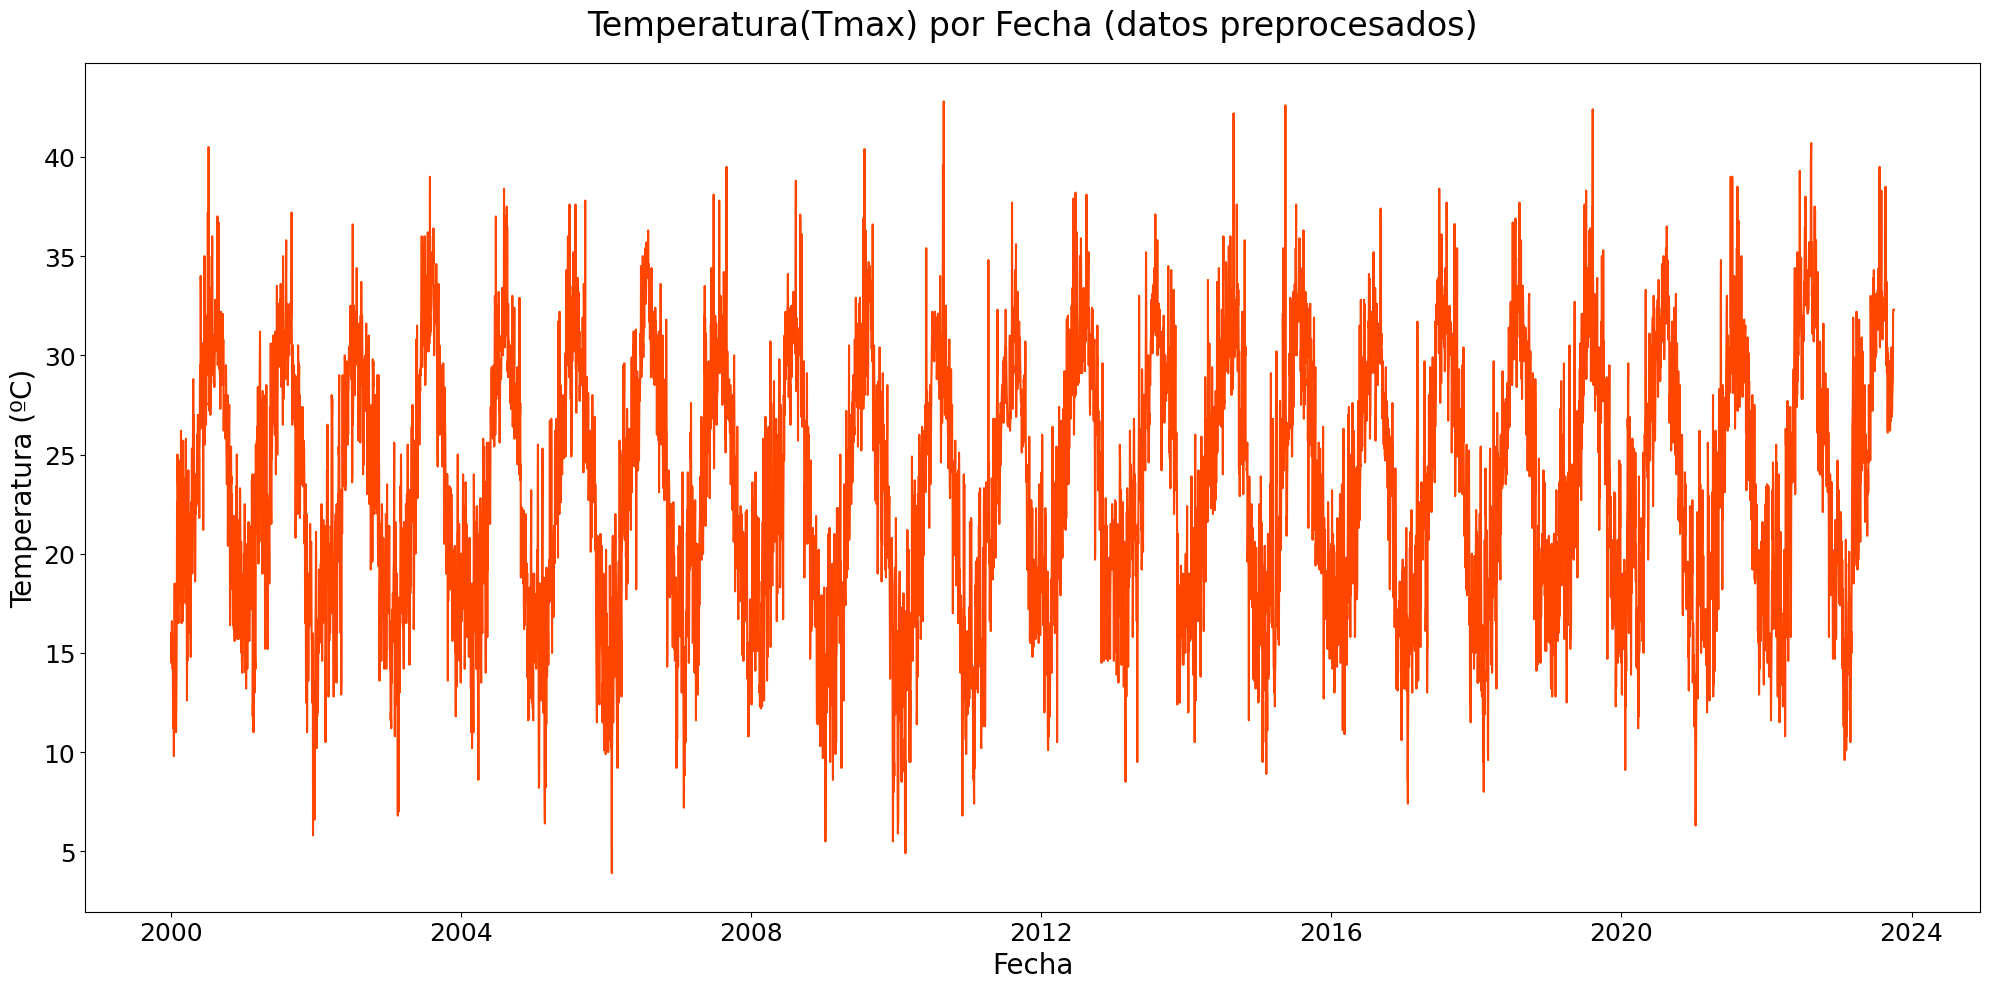

In [584]:
# Crear el gráfico de líneas
plt.figure(figsize=(20, 10))
plt.plot(df_concatenado['Fecha'], df_concatenado['Tmax'], label='Temperatura(Tmax)', color='orangered', marker='')
plt.title('Temperatura(Tmax) por Fecha (datos preprocesados)', fontsize=24, pad= 20)
plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Temperatura (ºC)', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [585]:
# Asegurarse de que la columna 'fecha' esté en formato de datetime
df_concatenado['Fecha'] = pd.to_datetime(df_concatenado['Fecha'])

# Crear un rango de fechas completo desde la primera hasta la última fecha con frecuencia horaria
fecha_inicio = df_concatenado['Fecha'].min()
fecha_fin = df_concatenado['Fecha'].max()
rango_fechas_completo = pd.date_range(start=fecha_inicio, end=fecha_fin, freq='h')

# Identificar las fechas que están presentes en el rango esperado, pero no en los datos reales
fechas_faltantes = rango_fechas_completo.difference(df_concatenado['Fecha'])

print("Fechas faltantes:")
print(fechas_faltantes)

Fechas faltantes:
DatetimeIndex(['2000-01-01 01:00:00', '2000-01-01 02:00:00',
               '2000-01-01 03:00:00', '2000-01-01 04:00:00',
               '2000-01-01 05:00:00', '2000-01-01 06:00:00',
               '2000-01-01 07:00:00', '2000-01-01 08:00:00',
               '2000-01-01 09:00:00', '2000-01-01 10:00:00',
               ...
               '2023-10-03 14:00:00', '2023-10-03 15:00:00',
               '2023-10-03 16:00:00', '2023-10-03 17:00:00',
               '2023-10-03 18:00:00', '2023-10-03 19:00:00',
               '2023-10-03 20:00:00', '2023-10-03 21:00:00',
               '2023-10-03 22:00:00', '2023-10-03 23:00:00'],
              dtype='datetime64[ns]', length=199571, freq=None)


# Modelo Regresión Lineal (Temperatura Tmin)

In [586]:
# Transformar la serie temporal usando una ventana deslizante a formato supervisado
def series_to_supervised(data, window=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(window, 0, -1)] # Crear una lista de DataFrames con desplazamientos (shifts) de la serie
    columns.append(df)  # Añadir la columna sin desplazar (el valor actual)
    df = pd.concat(columns, axis=1)
    df.dropna(inplace=True) # Eliminar las filas con valores nulos generados por el desplazamiento
    return df

# Aplicar ventana deslizante
window_size = 5
data_supervised = series_to_supervised(df['Tmin'], window=window_size)
X = data_supervised.iloc[:, :-1] # Características
y = data_supervised.iloc[:, -1] # Etiquetas

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print (f"Temperatura Tmin")
print(f"Error Cuadrático Medio (MSE) : {mse:.2f}")
print(f"Coeficiente de Determinación R^2: {r2:.2f}")

Temperatura Tmin
Error Cuadrático Medio (MSE) : 4.43
Coeficiente de Determinación R^2: 0.90


In [587]:
# Transformar la serie temporal usando una ventana deslizante a formato supervisado
def series_to_supervised(data, window=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(window, 0, -1)] # Crear una lista de DataFrames con desplazamientos (shifts) de la serie
    columns.append(df)  # Añadir la columna sin desplazar (el valor actual)
    df = pd.concat(columns, axis=1)
    df.dropna(inplace=True) # Eliminar las filas con valores nulos generados por el desplazamiento
    return df

# Aplicar ventana deslizante
window_size = 5
data_supervised = series_to_supervised(df['Tmax'], window=window_size)
X = data_supervised.iloc[:, :-1] # Características
y = data_supervised.iloc[:, -1] # Etiquetas

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print (f"Temperatura Tmax")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación R^2: {r2:.2f}")

Temperatura Tmax
Error Cuadrático Medio (MSE): 7.10
Coeficiente de Determinación R^2: 0.83


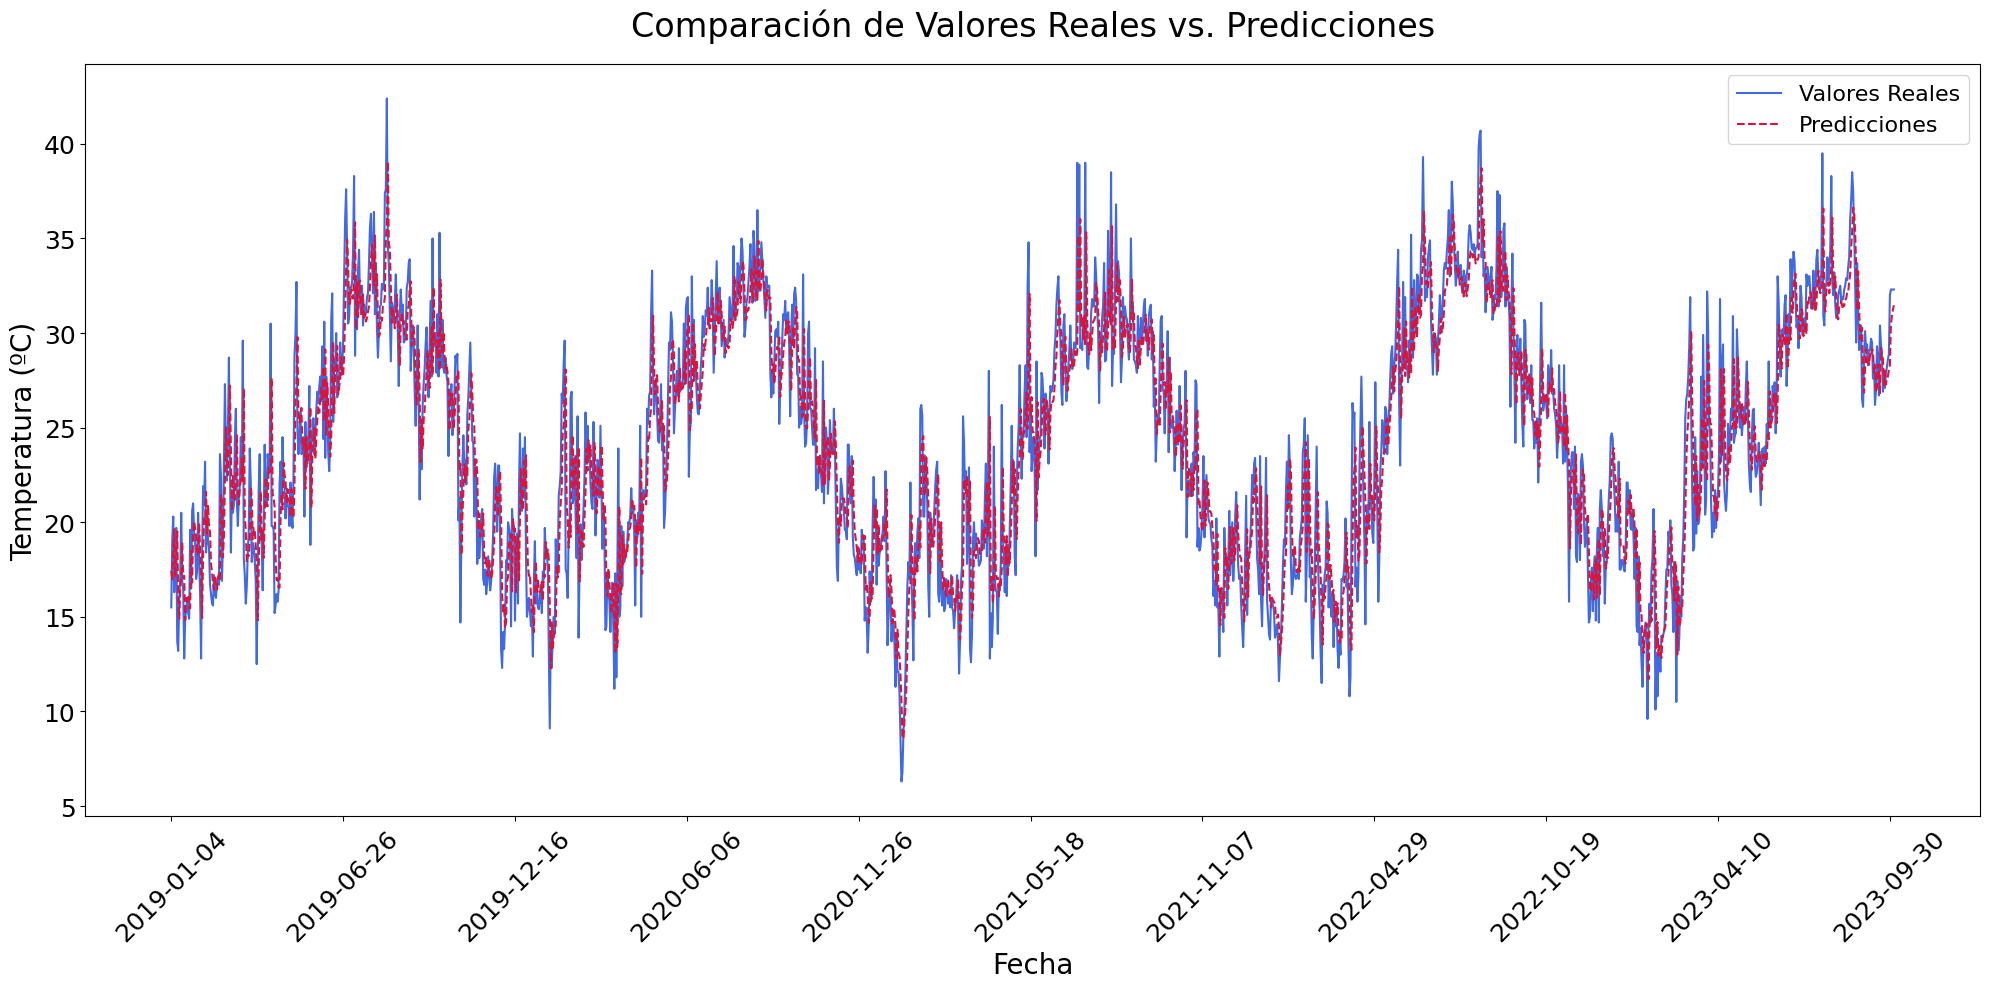

In [588]:
plt.figure(figsize=(20, 10))
plt.plot(df['Fecha'][-len(y_test):], y_test, label='Valores Reales', color='royalblue')
plt.plot(df['Fecha'][-len(y_pred):], y_pred, label='Predicciones', color='crimson', linestyle='dashed')
plt.legend(fontsize=16)
plt.title('Comparación de Valores Reales vs. Predicciones', fontsize=24, pad = 20)
plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Temperatura (ºC)', fontsize=20)

# Limitar el número de ticks en el eje X para una mejor visualización
num_ticks = 10
selected_ticks = df['Fecha'][-len(y_test):].tolist()[::len(y_test)//num_ticks]
plt.xticks(selected_ticks, rotation=45)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.show()

# Modelo AR

In [589]:
# Ruta al fichero (cámbiala según tu necesidad)
file_path = './DatosTempValenciaAirport.csv'

# Cargar el fichero en un DataFrame
df = pd.read_csv(file_path, sep=(';'))

# Asegurarse de que la columna 'fecha' esté en formato de datetime

#Añadimos temperatura media

#df['Tmedia'] = (df['Tmax'] + df['Tmin'])/2

#Mostramos cuantas filas y columnas se han cargado en total
print(f"Se han cargado {df.shape[0]} filas y {df.shape[1]} columnas")
# Mostrar las primeras filas para verificar
print(df.head())

Se han cargado 8678 filas y 3 columnas
    Fecha  Tmax  Tmin
0  1/1/00  16.0   1.6
1  2/1/00  14.5   2.2
2  3/1/00  15.0   5.0
3  4/1/00  16.6   3.0
4  5/1/00  15.8   2.6


<ipython-input-590-3277f8310315>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Fecha'] = pd.to_datetime(df['Fecha'])


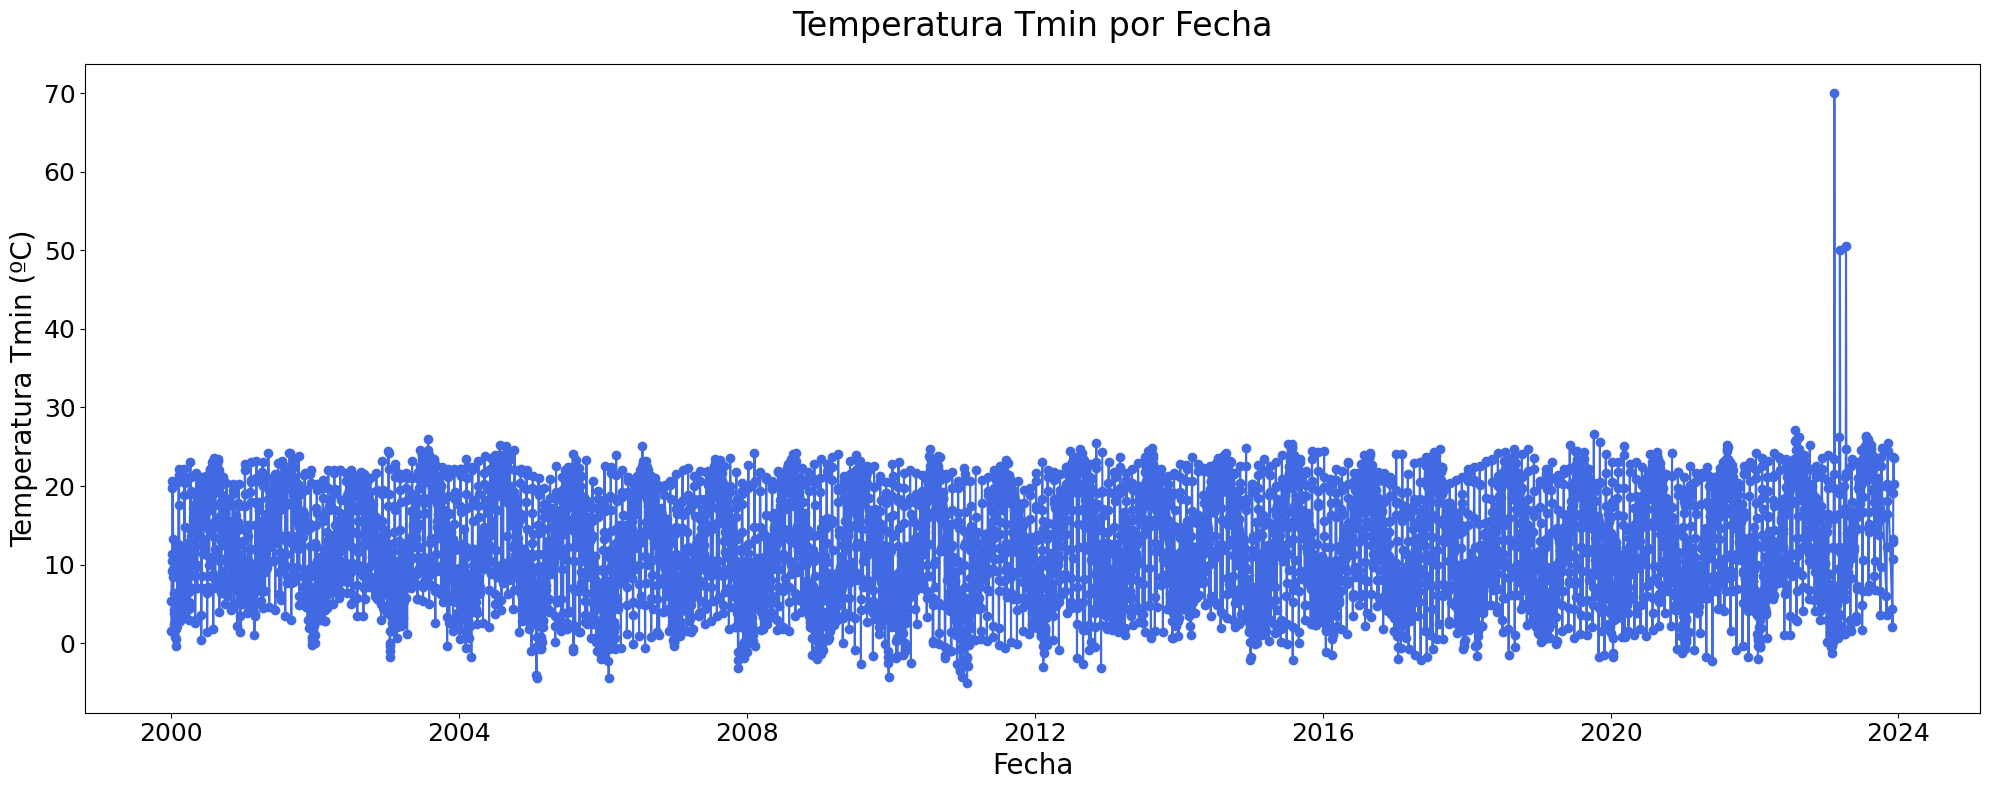

In [590]:
# Asegúrate de que la columna "fecha" esté en formato de fecha
df['Fecha'] = pd.to_datetime(df['Fecha'])
df = df.sort_values('Fecha')

# Crear el gráfico
plt.figure(figsize=(20, 8))  # Ajusta el tamaño según lo desees
plt.plot(df['Fecha'], df['Tmin'], label='Temperatura laguna', color='royalblue', marker='o')
plt.title('Temperatura Tmin por Fecha', fontsize=24, pad= 20)
plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Temperatura Tmin (ºC)', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(False)
plt.tight_layout()
plt.show()

In [596]:
horizonte = 20
train = df['Tmin'].iloc[:-horizonte]
test = df['Tmin'].tail(horizonte)

In [599]:
train = train.replace([np.inf, -np.inf], np.nan).dropna()

In [602]:
# Aplicamos el modelo AR
modelo_ar = AutoReg(train, lags=10)  # Puedes cambiar el número de lags si es necesario
resultados_ar = modelo_ar.fit()
print(resultados_ar.summary())

                            AutoReg Model Results                             
Dep. Variable:                   Tmin   No. Observations:                 8619
Model:                    AutoReg(10)   Log Likelihood              -24372.648
Method:               Conditional MLE   S.D. of innovations              4.105
Date:                Fri, 25 Oct 2024   AIC                          48769.297
Time:                        22:09:34   BIC                          48854.023
Sample:                            10   HQIC                         48798.191
                                 8619                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1860      0.130     16.861      0.000       1.932       2.440
Tmin.L1        0.7676      0.011     71.240      0.000       0.746       0.789
Tmin.L2        0.0451      0.014      3.321      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [603]:
pred = resultados_ar.predict(start=len(train), end=len(train)+19)

mse = mean_squared_error(test, pred)
r2 = r2_score(test, pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación R^2: {r2:.2f}")

Error Cuadrático Medio (MSE): 53.00
Coeficiente de Determinación R^2: 0.02


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


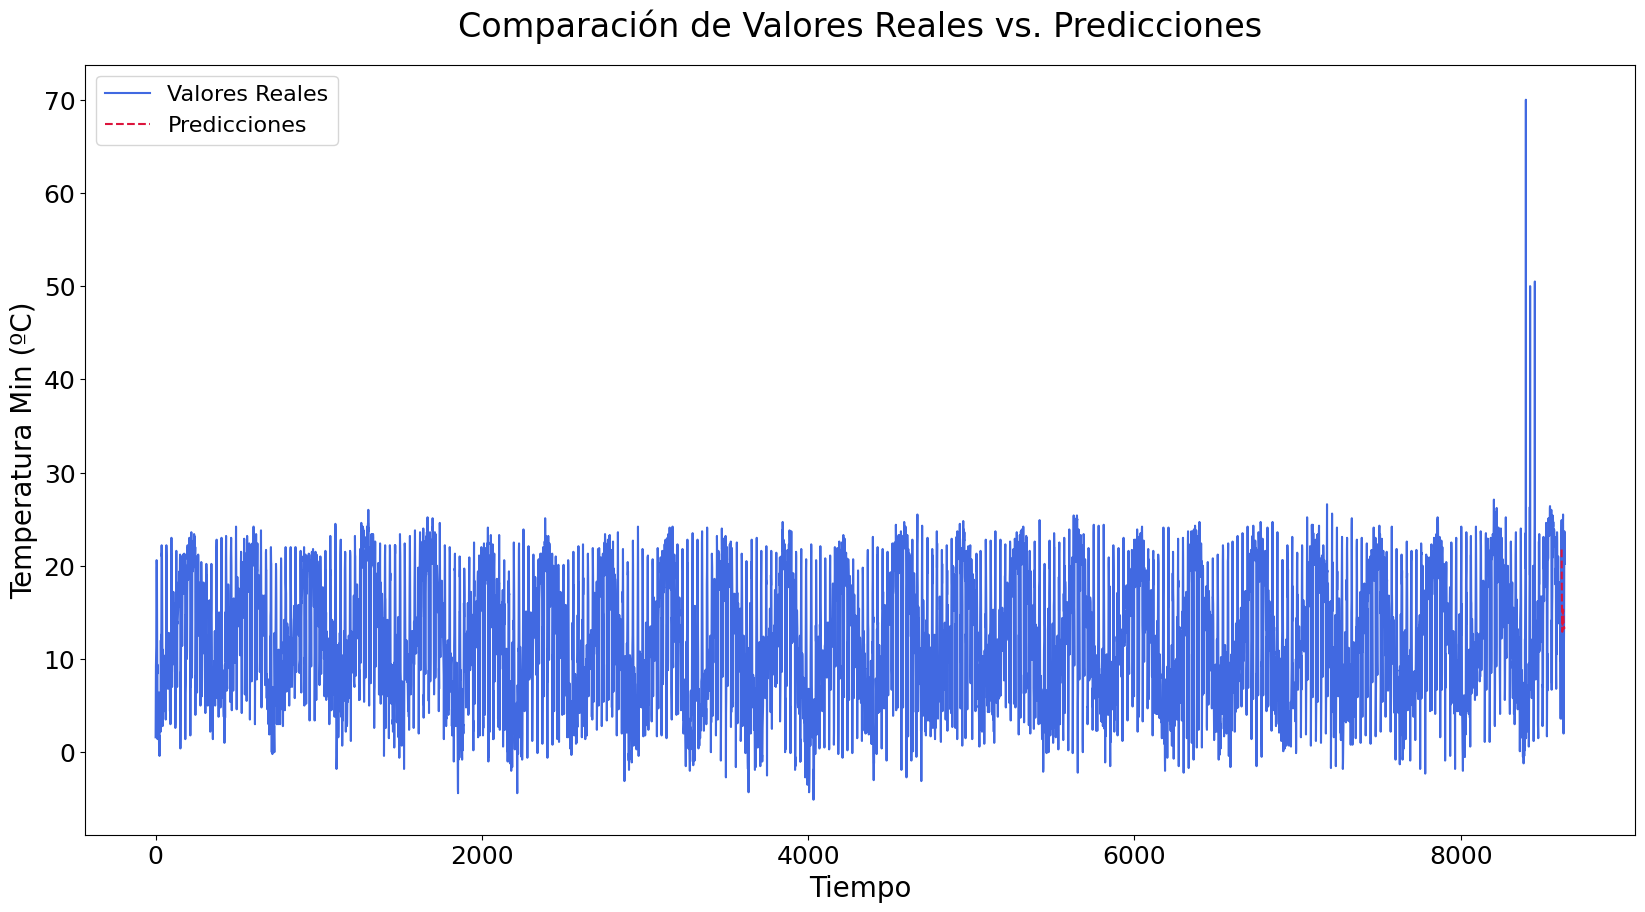

In [604]:
# Tamaño de la figura
plt.figure(figsize=(20,10))

# Graficar los valores reales (test)
full_data = np.concatenate([train, test])

plt.plot(full_data, label='Valores Reales', color='royalblue')

# Graficar las predicciones (pred)
plt.plot(pred, label='Predicciones', color='crimson', linestyle='--')

# Título y etiquetas
plt.legend(fontsize=16)
plt.title('Comparación de Valores Reales vs. Predicciones', fontsize=24, pad = 20)
plt.xlabel('Tiempo', fontsize=20)
plt.ylabel('Temperatura Min (ºC)', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Mostrar la gráfica
plt.show()

In [605]:
pred = resultados_ar.predict(start=len(train), end=len(train)+19)

mse = mean_squared_error(test, pred)
r2 = r2_score(test, pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación R^2: {r2:.2f}")

Error Cuadrático Medio (MSE): 53.00
Coeficiente de Determinación R^2: 0.02


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


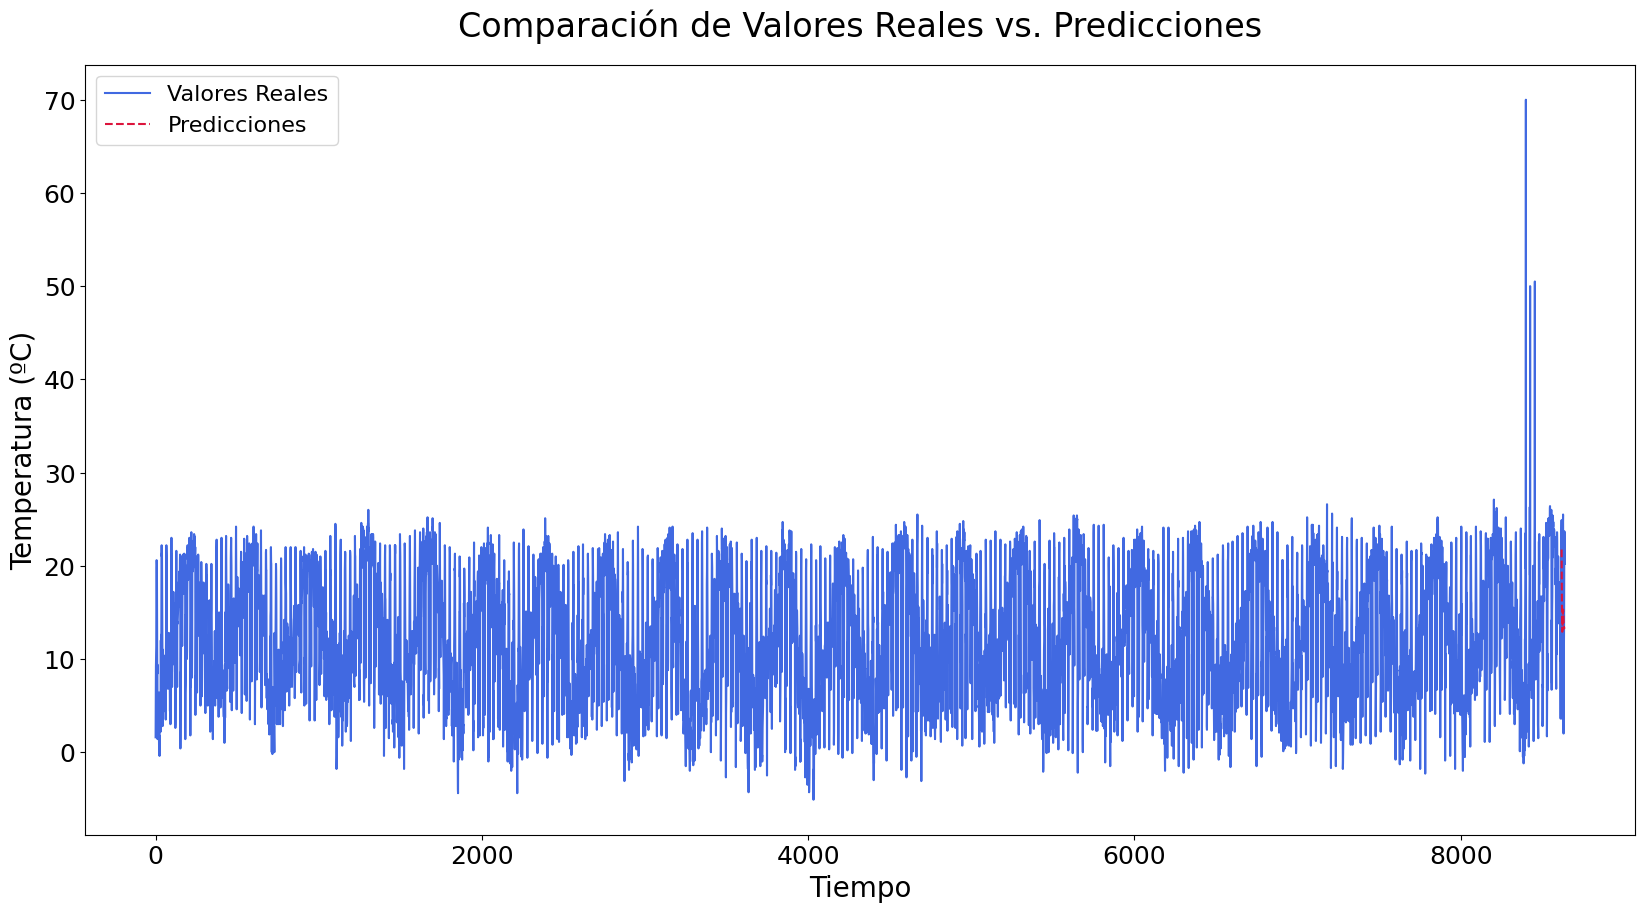

In [606]:
# Tamaño de la figura
plt.figure(figsize=(20,10))

# Graficar los valores reales (test)
full_data = np.concatenate([train, test])

plt.plot(full_data, label='Valores Reales', color='royalblue')

# Graficar las predicciones (pred)
plt.plot(pred, label='Predicciones', color='crimson', linestyle='--')

# Título y etiquetas
plt.legend(fontsize=16)
plt.title('Comparación de Valores Reales vs. Predicciones', fontsize=24, pad = 20)
plt.xlabel('Tiempo', fontsize=20)
plt.ylabel('Temperatura (ºC)', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Mostrar la gráfica
plt.show()

In [607]:
modelARIMA = ARIMA(train, order=(5,1,4))
resultados_arima = modelARIMA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as s

In [608]:
predARIMA = resultados_arima.predict(start=len(train), end=len(train)+19, dynamic=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [609]:
mse = mean_squared_error(test, predARIMA)
r2 = r2_score(test, predARIMA)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación R^2: {r2:.2f}")

Error Cuadrático Medio (MSE): 54.16
Coeficiente de Determinación R^2: -0.00


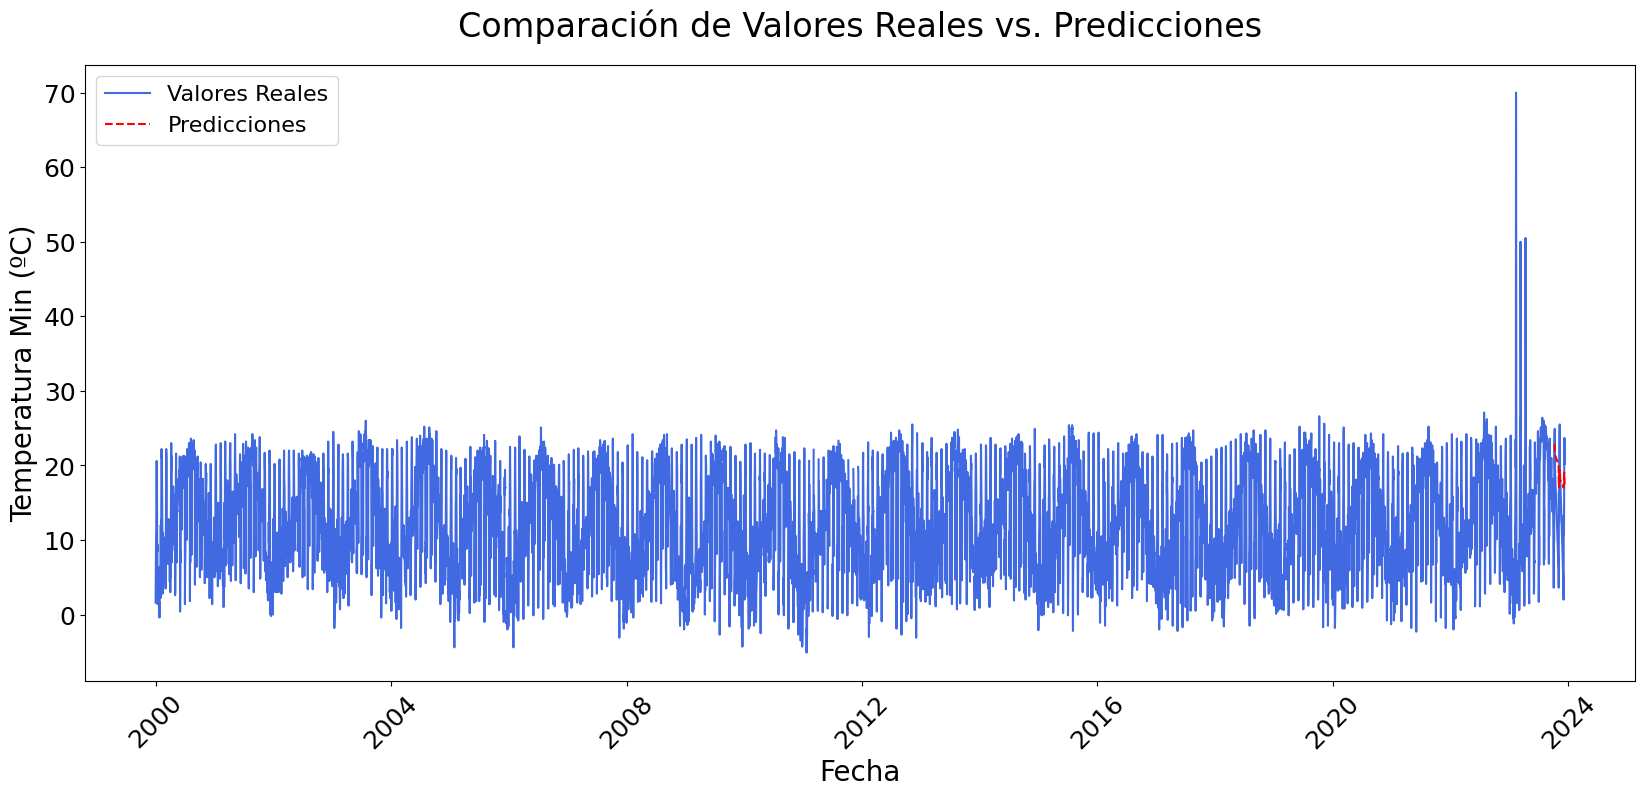

In [610]:
test_dates = df['Fecha'].tail(horizonte)
# Tamaño de la figura
plt.figure(figsize=(20,8))

plt.plot(df['Fecha'], df['Tmin'], label='Valores Reales', color='royalblue')

# Graficar las predicciones (pred)
plt.plot(test_dates, predARIMA, label='Predicciones', color='red', linestyle='--')

# Título y etiquetas
plt.legend(fontsize=16)
plt.title('Comparación de Valores Reales vs. Predicciones', fontsize=24, pad = 20)
plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Temperatura Min (ºC)', fontsize=20)
plt.xticks(fontsize=18, rotation=45)
plt.yticks(fontsize=18)

# Mostrar la gráfica
plt.show()

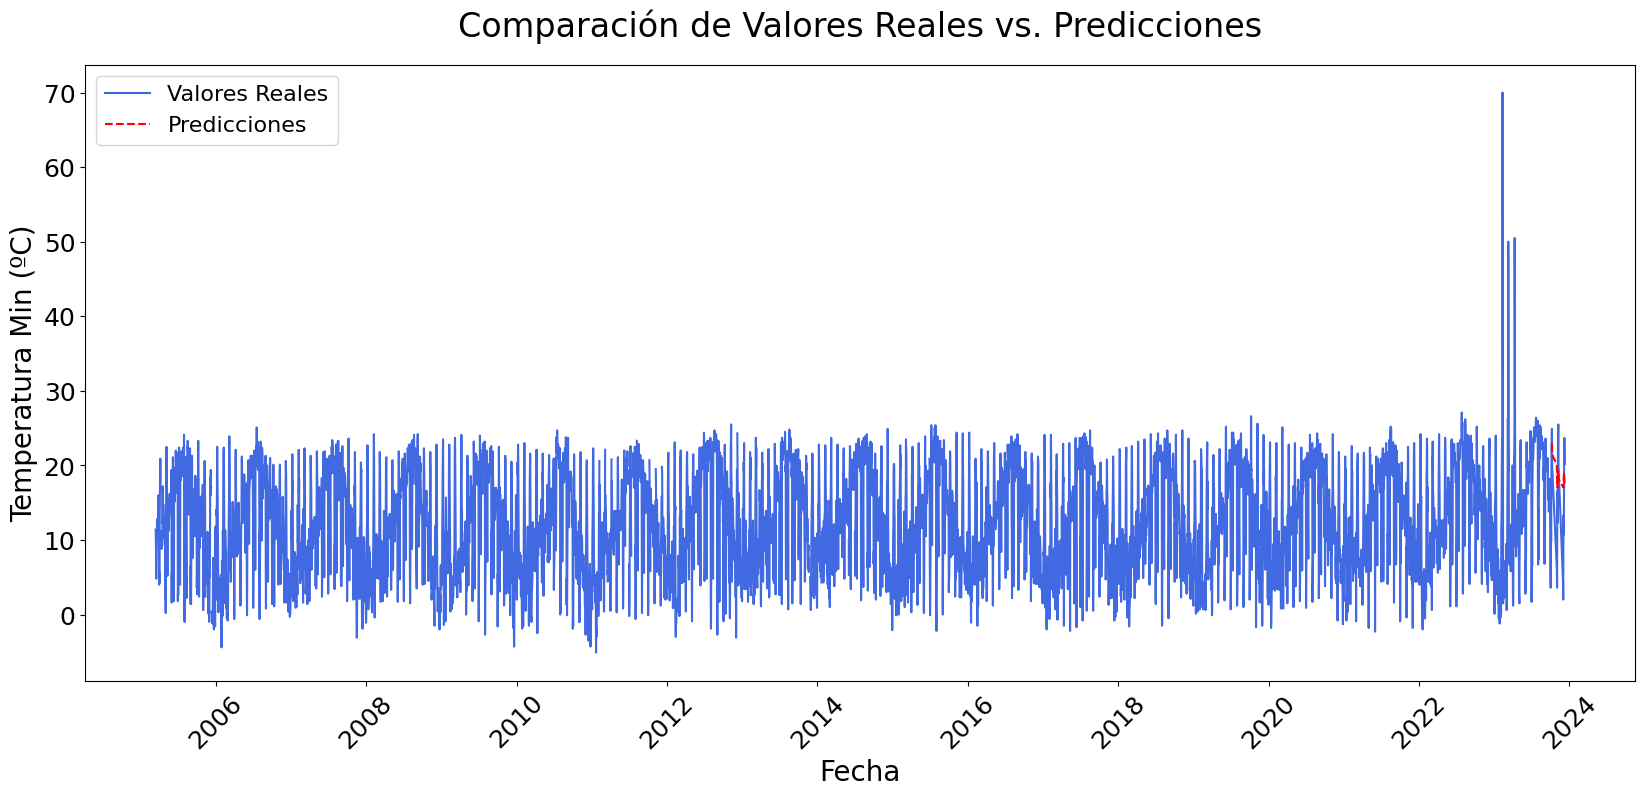

In [611]:
test_dates = df['Fecha'].tail(horizonte)
# Tamaño de la figura
plt.figure(figsize=(20,8))

plt.plot(df['Fecha'][1900:], df['Tmin'][1900:], label='Valores Reales', color='royalblue')

# Graficar las predicciones (pred)
plt.plot(test_dates, predARIMA, label='Predicciones', color='red', linestyle='--')

# Título y etiquetas
plt.legend(fontsize=16)
plt.title('Comparación de Valores Reales vs. Predicciones', fontsize=24, pad = 20)
plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Temperatura Min (ºC)', fontsize=20)
plt.xticks(fontsize=18, rotation=45)
plt.yticks(fontsize=18)

# Mostrar la gráfica
plt.show()

In [615]:
df = df.dropna(subset=['Tmin'])

In [616]:
stepwise_fit = pm.auto_arima(df['Tmin'],
                             trace=True,
                             suppress_warnings=True,
                             seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=49115.847, Time=21.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=70379.932, Time=0.36 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=50080.200, Time=0.81 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=62058.569, Time=2.61 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=50031.776, Time=2.31 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=49145.291, Time=2.78 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=50008.579, Time=12.51 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=49025.197, Time=11.99 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=49575.996, Time=5.99 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=49353.988, Time=11.68 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=49033.422, Time=12.28 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=49067.901, Time=5.52 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=49004.968, Time=12.76 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=48839.516, Time=12.68 sec
 ARIMA(4,0,3

In [617]:
print(stepwise_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 8639
Model:               SARIMAX(5, 0, 4)   Log Likelihood              -24304.317
Date:                Fri, 25 Oct 2024   AIC                          48628.633
Time:                        22:18:01   BIC                          48699.274
Sample:                             0   HQIC                         48652.720
                               - 8639                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9665      0.014    136.867      0.000       1.938       1.995
ar.L2         -0.8695      0.040    -21.471      0.000      -0.949      -0.790
ar.L3         -1.2037      0.055    -21.774      0.0